In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from cell import Cell
import numpy
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns

## first simulation growth without any abx as an integrity check

In [3]:
param = {"ribo_min": 0, 
         "p_in": 1, 
         "p_out": 1, 
         "k_on": 1, 
         "k_off": 1, 
         "alpha": 1, 
         "beta": 1, 
         "gama": 1, 
         "abx_env": 0, 
         "t_start": 10000, 
         "t_end": -1}
my_sim = Cell(**param)

In [4]:
initial_conditions = [0, 1, 0, 0, 1] # internal antibiotics, unbound ribosomes, bound ribosomes, precursors, cell volume
time_series = my_sim.cell_growth(initial_conditions, length=20, methods="RK45")

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 7195.21‰/s]


In [5]:
print(time_series)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-02 ...  1.934e+01  2.000e+01]
        y: [[ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
            [ 1.000e+00  1.010e+00 ...  1.998e+00  2.000e+00]
            ...
            [ 0.000e+00  1.000e-02 ...  9.985e-01  9.996e-01]
            [ 1.000e+00  1.000e+00 ...  1.249e+08  2.407e+08]]
      sol: None
 t_events: None
 y_events: None
     nfev: 115
     njev: 0
      nlu: 0


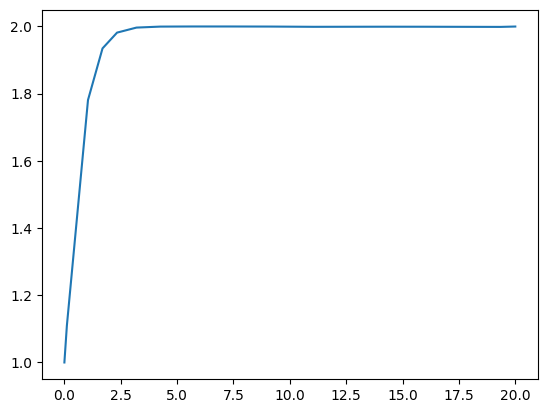

In [6]:
plt.plot(time_series.t, time_series.y[1])
plt.show()

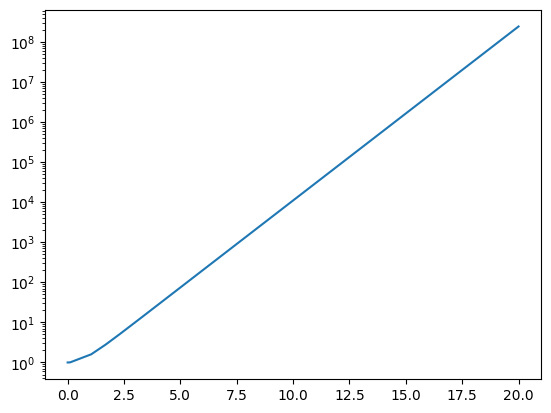

In [7]:
fig, ax = plt.subplots()
ax.plot(time_series.t, time_series.y[4])
ax.set_yscale('log')
plt.show()

## abx treatment - constant env

In [68]:
param = {"ribo_min": 0, 
         "p_in": 20, 
         "p_out": 1, 
         "k_on": 1, 
         "k_off": 1, 
         "alpha": .6, 
         "beta": .15, 
         "gama": .5, 
         "abx_env": 1, 
         "t_start": 50, 
         "t_end": -1}
my_sim = Cell(**param)

In [72]:
initial_conditions = [0, 1, 0, 0, 1] # internal antibiotics, unbound ribosomes, bound ribosomes, precursors, cell volume
time_series = my_sim.cell_growth(initial_conditions, length=100, methods="RK45")

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 14924.81‰/s]


In [73]:
print(time_series)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-02 ...  9.997e+01  1.000e+02]
        y: [[ 0.000e+00  0.000e+00 ...  2.077e+01  2.077e+01]
            [ 1.000e+00  1.006e+00 ... -1.963e-01 -1.961e-01]
            ...
            [ 0.000e+00  1.501e-03 ... -6.268e-02 -6.268e-02]
            [ 1.000e+00  1.000e+00 ...  7.054e+11  7.048e+11]]
      sol: None
 t_events: None
 y_events: None
     nfev: 2077
     njev: 0
      nlu: 0


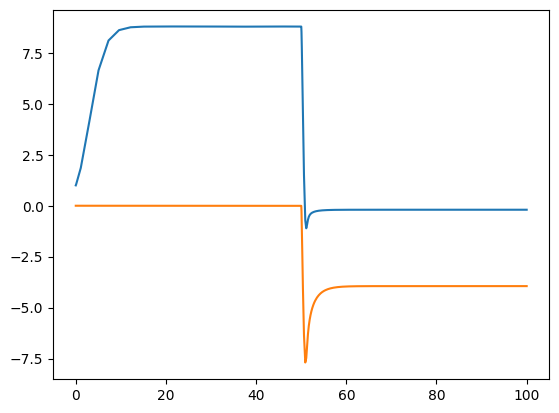

In [74]:
plt.plot(time_series.t, time_series.y[1])
plt.plot(time_series.t, time_series.y[2])
plt.show()

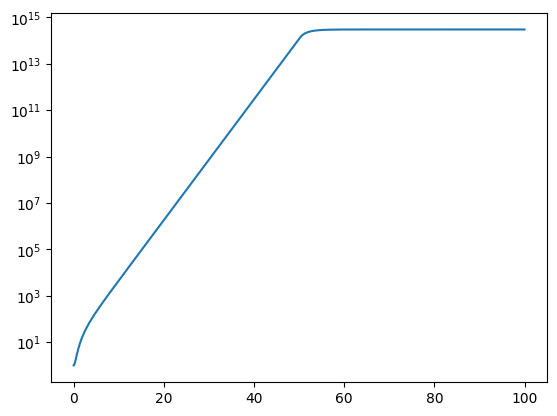

In [67]:
fig, ax = plt.subplots()
ax.plot(time_series.t, time_series.y[4])
ax.set_yscale('log')
plt.show()